# DATA VISUALIZATION
Data visualization is the discipline of trying to understand data by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed. Python offers multiple great graphing libraries that come packed with lots of different features.

In [1]:
# Get data with pandas
'''''
Pandas is a Python library used for working with data sets.
It has functions for analyzing, cleaning, exploring, and manipulating data.
Pandas allows us to analyze big data and make conclusions based on statistical theories.
Pandas can clean messy data sets, and make them readable and relevant.
Relevant data is very important in data science.
'''''
import pandas as pd
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv') #This is how we read data use pandas
print("Data size : ",data.shape) #Returns the size of data
print("Top 5 data :")
print(data.head()) #Returns top 5 data

Data size :  (5000, 9)
Top 5 data :
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J        10      740000  
1  BRAND_R         2      604000  
2  BRAND_C         8     1045000  
3  BRAND_A         4      205000  
4  BRAND_R         2     4475000  


In [2]:
# Create a month column
import datetime
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv') 
data['order_month'] = data['order_date'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m"))
print(data.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month  
0  BRAND_J        10      740000     2019-10  
1  BRAND_R         2      604000     2019-10  
2  BRAND_C         8     1045000     2019-11  
3  BRAND_A         4      205000     2019-08  
4  BRAND_R         2     4475000     2019-10  


In [3]:
# Create a GMV column
data['GMV'] = data['item_price'] * data['quantity']
print(data.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      GMV  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  


In [4]:
# Create aggregated data
monthly_gmv = data.groupby('order_month')['GMV'].sum().reset_index()
print(monthly_gmv)

  order_month         GMV
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


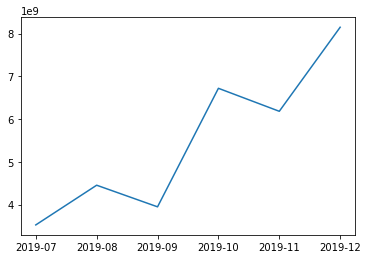

In [5]:
# Create trend chart with matplotlib
'''''
- Matplotlib is a low level graph plotting library in python that serves as a visualization utility.
- Matplotlib was created by John D. Hunter.
- Matplotlib is open source and we can use it freely.
- Matplotlib is mostly written in python, a few segments are written in C, Objective-C and Javascript for Platform 
compatibility.
'''''
import matplotlib.pyplot as plt
plt.plot(monthly_gmv['order_month'],monthly_gmv['GMV'])
plt.show()

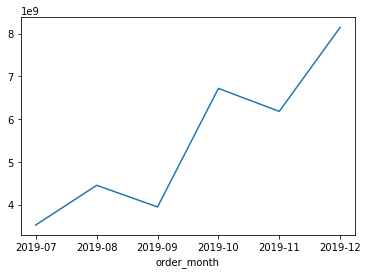

In [6]:
# Another way
import matplotlib.pyplot as plt
monthly_gmv.groupby(['order_month'])['GMV'].sum().plot()
plt.show()

In [ ]:
==========================================================================================================================

<img src="Images/plot_anatomy.png"/>
image source : https://matplotlib.org/3.1.3/gallery/showcase/anatomy.html

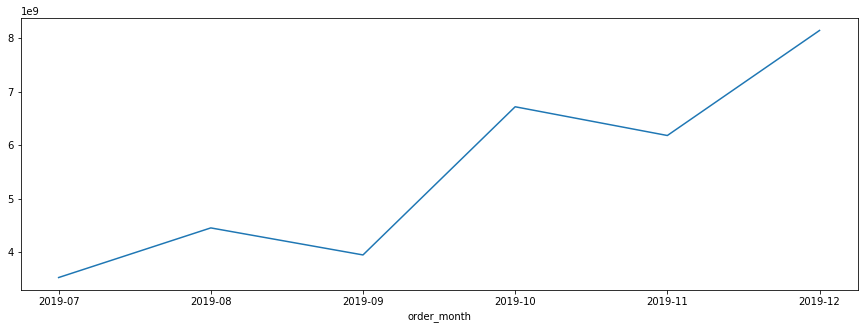

In [7]:
# Change the figure size of chart
plt.figure(figsize=(15,5))
monthly_gmv.groupby(['order_month'])['GMV'].sum().plot()
plt.show()
'''''
The figsize attribute allows us to specify the width and height of a figure in unit inches.
'''''

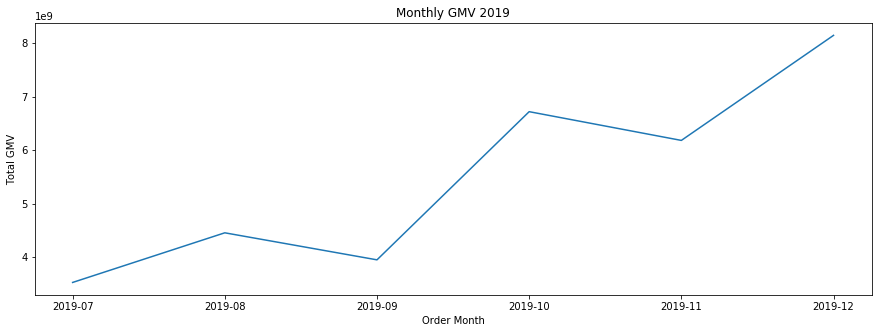

In [8]:
# Change title and labels 
plt.figure(figsize=(15,5))
plt.plot(monthly_gmv['order_month'],monthly_gmv['GMV'])
#
plt.title('Monthly GMV 2019') # Changes the title name
plt.xlabel('Order Month') # Changes the x axis label
plt.ylabel('Total GMV') # Changes the y axis label
#
plt.show()

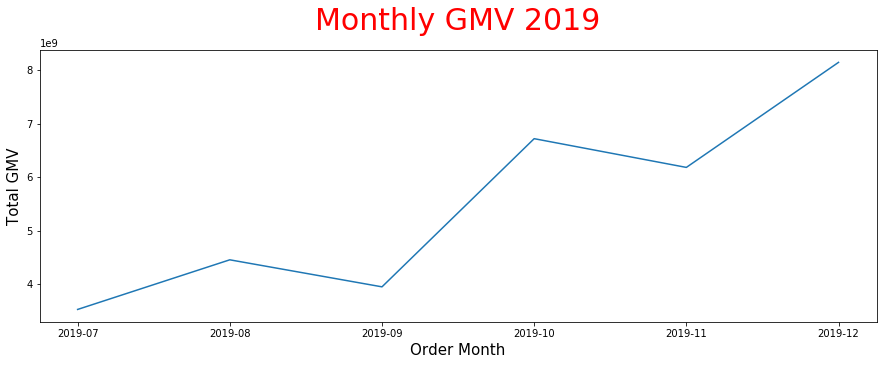

In [11]:
# Title and label customization
'''''
loc = changes the position('left','right','center') => title
pad = gives distance between title and chart => title
color = gives color on font ('blue','orange','#42DDF5',etc) => title and labels
fontsize = changes size of font => title and labels
'''''
plt.figure(figsize=(15,5))
plt.plot(monthly_gmv['order_month'],monthly_gmv['GMV'])
#
plt.title('Monthly GMV 2019',loc='center',pad=20,fontsize=30,color='red')
plt.xlabel('Order Month',fontsize=15)
plt.ylabel('Total GMV',fontsize=15)
#
plt.show()

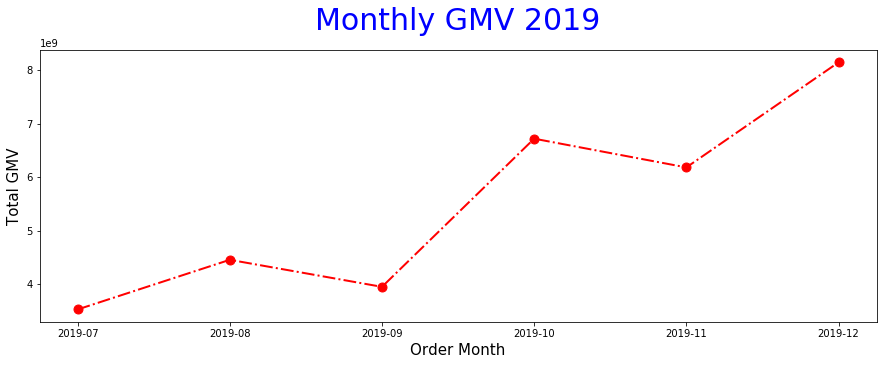

In [19]:
# Line chart and its point customization
'''''
color = changes the line color ('green','blue',etc)
marker = changes the points type on chart ('s' for square,'D' for diamond,'.' for small dot,'o' for normal dot,'+','x',etc)
linestyle = changes the kind of line ('.','-','-.',etc)
linewidth = changes the thickness of line (px)
markersize = changes the size of marker
'''''
plt.figure(figsize=(15,5))
#
plt.plot(monthly_gmv['order_month'],monthly_gmv['GMV'],color='red',linestyle='-.',linewidth=2,marker='o',markersize=9)
#
plt.title('Monthly GMV 2019',loc='center',color='blue',fontsize=30,pad=20)
plt.xlabel('Order Month',fontsize = 15)
plt.ylabel('Total GMV',fontsize = 15)
plt.show()

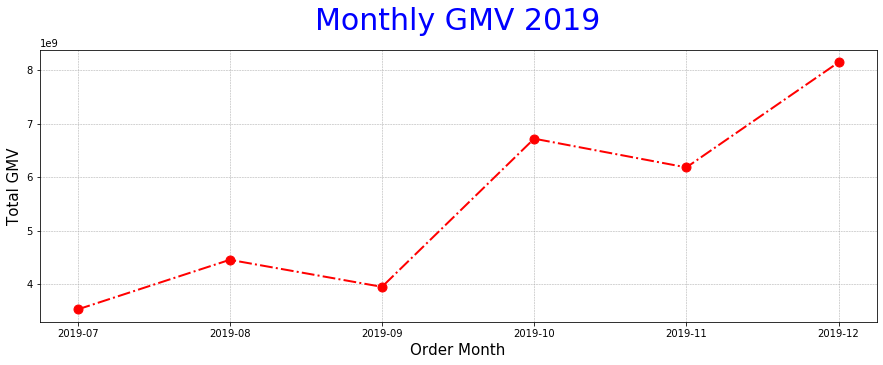

In [20]:
# Grid Customization
'''''
color = changes the line color ('green','blue',etc)
linestyle = changes the kind of line ('.','-','-.',etc)
linewidth = changes the thickness of line (px)
'''''
plt.figure(figsize=(15,5))
plt.plot(monthly_gmv['order_month'],monthly_gmv['GMV'],color='red',linestyle='-.',linewidth=2,marker='o',markersize=9)
plt.title('Monthly GMV 2019',loc='center',color='blue',pad=20,fontsize=30)
plt.xlabel('Order Month',fontsize=15)
plt.ylabel('Total GMV',fontsize=15)
#
plt.grid(color='darkgray',linestyle='--',linewidth=0.5)
#
plt.show()

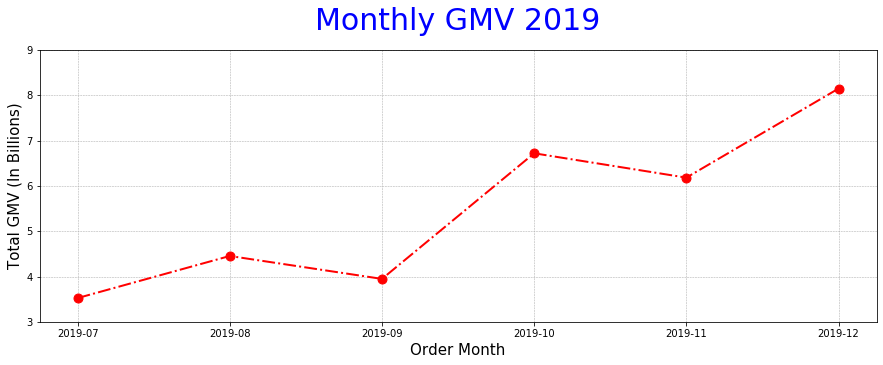

In [22]:
# Customize ticks
'''''
Syntax = matplotlib.pyplot.yticks(ticks=None, labels=None, **kwargs)
'''''
plt.figure(figsize=(15,5))
plt.plot(monthly_gmv['order_month'],monthly_gmv['GMV'],color='red',linestyle='-.',linewidth=2,marker='o',markersize=9)
plt.title('Monthly GMV 2019',loc='center',color='blue',pad=20,fontsize=30)
plt.xlabel('Order Month',fontsize=15)
plt.ylabel('Total GMV (In Billions)',fontsize=15)
labels, location = plt.yticks()
#
plt.yticks(labels,(labels/1000000000).astype(int))
#
plt.grid(color='darkgray',linestyle='--',linewidth=0.5)
plt.show()

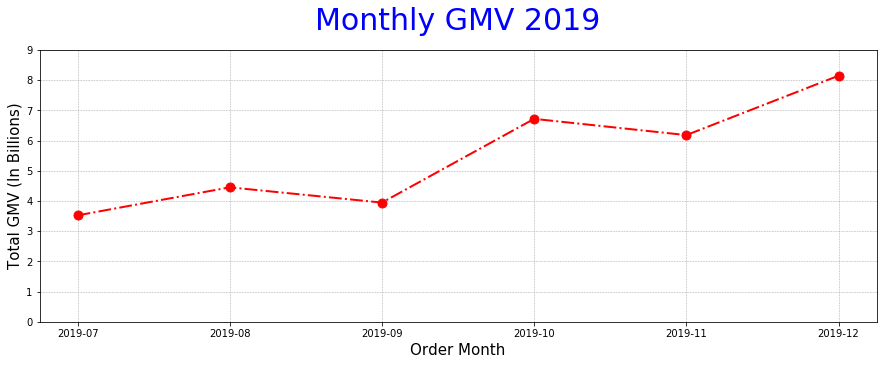

In [29]:
# Customize limit value of ticks
'''''
Syntax = matplotlib.pyplot.(y/x)lim(*args, **kwargs)
args :
- ymin / xmin = changes the minimum value
- ymax/ xmax = changes the maxsimum calue
'''''
plt.figure(figsize=(15,5))
plt.plot(monthly_gmv['order_month'],monthly_gmv['GMV'],color='red',linestyle='-.',linewidth=2,marker='o',markersize=9)
plt.title('Monthly GMV 2019',loc='center',color='blue',pad=20,fontsize=30)
plt.xlabel('Order Month',fontsize=15)
plt.ylabel('Total GMV (In Billions)',fontsize=15)
#
plt.ylim(ymin=0)
#
labels, location = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.grid(color='darkgray',linestyle='--',linewidth=0.5)
plt.show()

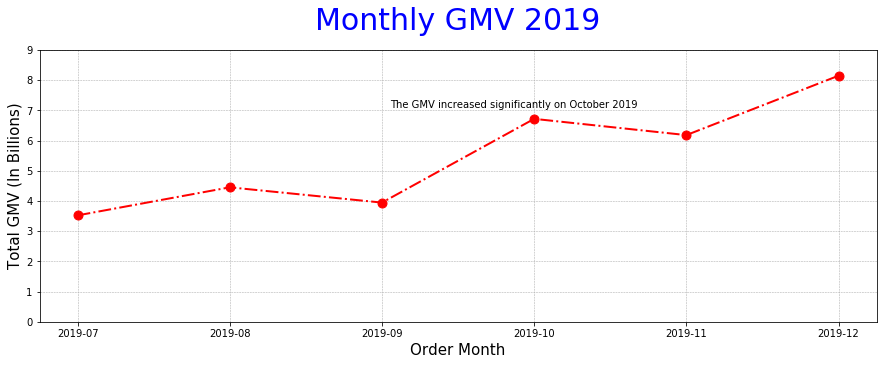

In [31]:
# Add text on chart
'''''
Syntax = matplotlib.pyplot.text(x, y, s, transform=fig.**args, **kwargs)
information :
x -> coordinate x
y -> coordinate y
s = text

Coordinates 	 Transformation object  	 Description
"data"	ax.transData	The coordinate system for the data, controlled by xlim and ylim.
"axes"	ax.transAxes	The coordinate system of the Axes; (0, 0) is bottom left of the axes, and (1, 1) is top right 
of the axes.
"figure"	fig.transFigure	The coordinate system of the Figure; (0, 0) is bottom left of the figure, and (1, 1) is top 
ight of the figure.
"figure-inches"	fig.dpi_scale_trans	The coordinate system of the Figure in inches; (0, 0) is bottom left of the figure,
and (width, height) is the top right of the figure in inches.
"display"	None, or IdentityTransform()	The pixel coordinate system of the display window; (0, 0) is bottom left of 
the window, and (width, height) is top right of the display window in pixels.
"xaxis", "yaxis"	ax.get_xaxis_transform(), ax.get_yaxis_transform()	Blended coordinate systems; use data 
coordinates on one of the axis and axes coordinates on the other.
'''''
fig = plt.figure(figsize=(15,5))
plt.plot(monthly_gmv['order_month'],monthly_gmv['GMV'],color='red',linestyle='-.',linewidth=2,marker='o',markersize=9)
plt.title('Monthly GMV 2019',loc='center',color='blue',pad=20,fontsize=30)
plt.xlabel('Order Month',fontsize=15)
plt.ylabel('Total GMV (In Billions)',fontsize=15)
plt.ylim(ymin=0)
labels, location = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.grid(color='darkgray',linestyle='--',linewidth=0.5)
plt.text(0.45,0.72,'The GMV increased significantly on October 2019',transform=fig.transFigure,color='black')
plt.show()

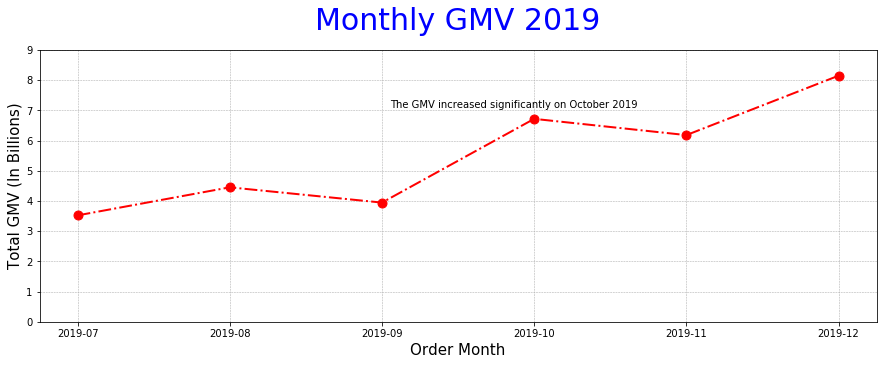

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

In [32]:
# Saving chart as an image
'''''
Syntax : matplotlib.pyplot.savefig(*args, **kwargs)
'''''
fig = plt.figure(figsize=(15,5))
plt.plot(monthly_gmv['order_month'],monthly_gmv['GMV'],color='red',linestyle='-.',linewidth=2,marker='o',markersize=9)
plt.title('Monthly GMV 2019',loc='center',color='blue',pad=20,fontsize=30)
plt.xlabel('Order Month',fontsize=15)
plt.ylabel('Total GMV (In Billions)',fontsize=15)
plt.ylim(ymin=0)
labels, location = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.grid(color='darkgray',linestyle='--',linewidth=0.5)
plt.text(0.45,0.72,'The GMV increased significantly on October 2019',transform=fig.transFigure,color='black')
plt.savefig('Images/linechart_gmv.png')
plt.show()

# Other format
plt.gcf().canvas.get_supported_filetypes()

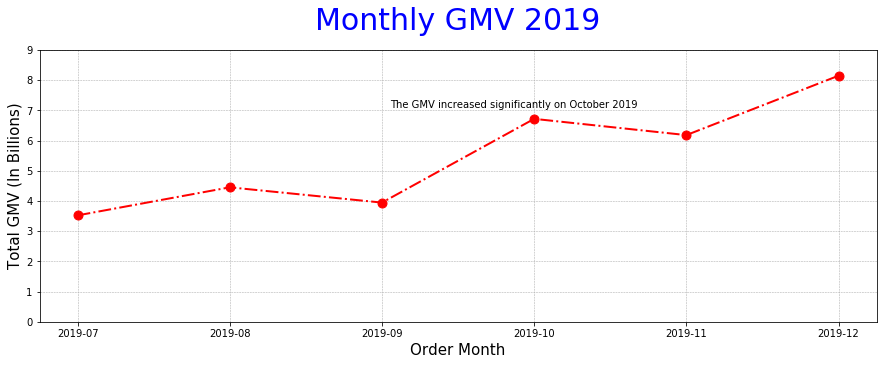

In [33]:
# Save file parameter setting
'''''
dpi = image resolution (dots per inch)
quality = image quality (0-95)(bad-great)
facecolor = add color in front of figure, out of the plot
edgecolor = add color in the edge of image
transparent = if True,the image will be transparent
'''''
fig = plt.figure(figsize=(15,5))
plt.plot(monthly_gmv['order_month'],monthly_gmv['GMV'],color='red',linestyle='-.',linewidth=2,marker='o',markersize=9)
plt.title('Monthly GMV 2019',loc='center',color='blue',pad=20,fontsize=30)
plt.xlabel('Order Month',fontsize=15)
plt.ylabel('Total GMV (In Billions)',fontsize=15)
plt.ylim(ymin=0)
labels, location = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.grid(color='darkgray',linestyle='--',linewidth=0.5)
plt.text(0.45,0.72,'The GMV increased significantly on October 2019',transform=fig.transFigure,color='black')
plt.savefig('Images/linechart_gmv95.png',quality=95)
plt.show()

Learning Sources :
- www.dqlab.id
- www.w3schools.com
- www.learningaboutelectronics.com
- www.matplotlib.org